# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
fecha='2021-11-19_17-55-37'
PATH = f"./measurements/full-x4/{fecha}"

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/figuras"):
    os.makedirs(f"{PATH}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,19/11/2021_17:55:40,667,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.19,25.06,25.69,30.31,26.06,Prendido
1,19/11/2021_17:55:45,667,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.19,25.12,25.69,30.56,26.00,Prendido
2,19/11/2021_17:55:51,668,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.19,25.12,25.69,30.81,26.00,Prendido
3,19/11/2021_17:55:57,668,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.12,25.00,25.62,31.00,26.00,Prendido
4,19/11/2021_17:56:03,669,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,26.12,25.06,25.62,31.31,26.00,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19/11/2021_18:04:57,688,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.25,25.19,25.81,48.50,26.19,Prendido
96,19/11/2021_18:05:02,688,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.25,25.19,25.81,48.69,26.19,Prendido
97,19/11/2021_18:05:08,688,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.31,25.19,25.75,-28.69,26.19,Prendido
98,19/11/2021_18:05:14,686,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,27.37,25.19,25.75,48.94,26.19,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)
print(datetime0)

19/11/2021_17:55:40


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(PATH):
    if file.endswith(".csv"):
        n += 1

print(n)

772


In [7]:
# Llenemos las listas con los datos
for i in range(n-1):
    df = pd.read_csv(f"{PATH}/data_{i}.csv")

    # CO2
    co2 = np.concatenate((co2, np.transpose(df["CO2"].to_numpy())))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

In [8]:
#co2[np.where(co2 == "!Warning: Clearing Byte: 154")[0][0]] = -1
#co2[np.where(co2 == "!Warning: Clearing Byte: 49")[0][0]] = -1
#co2[np.where(co2 == "!Warning: Clearing Byte: 49")[0][0]] = -1

In [10]:
#Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
#Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1) #encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1) #y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)

pos = [] #los guardo ordenados
for i in range(len(pos1[0])-1):
    pos.append(int(pos1[0][i]))
    pos.append(int(pos2[0][i]))
    pos.append(int(pos3[0][i]))
    pos.append(int(pos4[0][i]))
    pos.append(int(pos5[0][i]))

danza = [] #guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

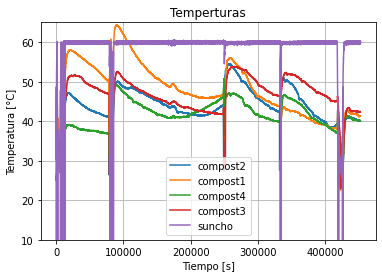

In [16]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(10,65)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/figuras/Temperatura.png")
plt.show()

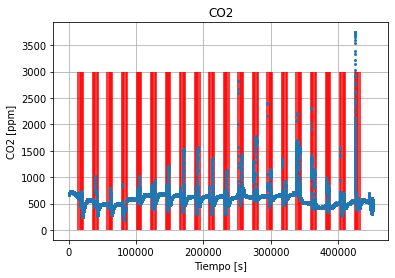

In [22]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".",markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
#plt.ylim(20,4000)
#plt.xlim(420000,440000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.savefig(f"{PATH}/figuras/CO2_completo.png")
plt.show()

# Integración

In [24]:
inicio_x=[] #posición para empezar a medir el área
inicio_y=[]
fin_x=[]
fin_y=[]
for i in range(len(pos) - 1):
    inicio_x.append(pos[i] + 60) #dejamos 60 posiciones (5 minutos aprox) de espera
    inicio_y.append(pos[i] + 60) #dejamos 60 posiciones (5 minutos aprox) de espera
    
    fin_x.append(pos[i + 1])
    fin_y.append(pos[i + 1])

#Remuevo los multiplos de 4, porque estarían de más
for i in range(len(pos1[0])-2):
    inicio_x.pop(4 * (i + 1))
    inicio_y.pop(4 * (i + 1))    
    fin_x.pop(4 * (i + 1))
    fin_y.pop(4 * (i + 1))

In [25]:
len(pos1[0])

21

In [26]:
len(inicio_x)

80

In [27]:
inicio_x

[2516,
 2823,
 3130,
 3437,
 6200,
 6507,
 6814,
 7121,
 9884,
 10191,
 10498,
 10805,
 13568,
 13875,
 14183,
 14491,
 17253,
 17560,
 17867,
 18174,
 20936,
 21243,
 21550,
 21857,
 24619,
 24926,
 25233,
 25540,
 28303,
 28610,
 28917,
 29224,
 31987,
 32294,
 32601,
 32908,
 35670,
 35977,
 36284,
 36591,
 39353,
 39660,
 39967,
 40274,
 43036,
 43343,
 43650,
 43957,
 46719,
 47026,
 47333,
 47640,
 50402,
 50709,
 51016,
 51323,
 54086,
 54393,
 54700,
 55007,
 57770,
 58077,
 58384,
 58691,
 61453,
 61760,
 62067,
 62374,
 65136,
 65443,
 65750,
 66057,
 68820,
 69127,
 69434,
 69741,
 72504,
 72811,
 73118,
 73425]

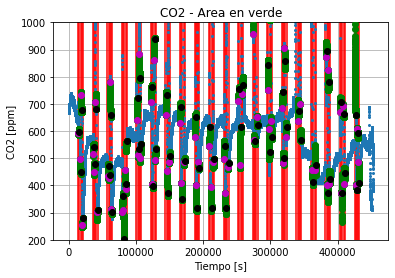

In [29]:
plt.figure("CO2")
plt.title("CO2 - Area en verde")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.ylim(200, 1000)
#plt.xlim(10000, 50000)
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")
plt.scatter(tiempos[inicio_x], co2[inicio_y], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin_x], co2[fin_y], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio_x)):
    plt.scatter(tiempos[inicio_x[i]:fin_x[i]], co2[inicio_y[i]:fin_y[i]], color="g", zorder=3)
plt.show()

In [30]:
#Ahora si, calculo el área:

area = []
for i in range(len(inicio_x)):
    area.append(trapezoid(co2[inicio_y[i]:fin_y[i]], tiempos[inicio_x[i]:fin_x[i]]))
    
print(area)

[861577.5, 680407.0, 999943.0, 373595.5, 777764.5, 680266.5, 1013391.5, 417690.5, 661939.0, 633581.0, 1001593.5, 437191.5, 494296.5, 354747.5, 593983.0, 690197.0, 1007897.0, 743866.5, 1160173.0, 766309.0, 1090384.5, 575843.0, 1297863.0, 734609.0, 1034822.5, 574966.0, 1721639.0, 730399.0, 983064.0, 542898.5, 2161321.0, 703354.5, 933170.5, 481938.5, 2209964.0, 678543.5, 854629.0, 480621.5, 1924268.0, 693415.0, 785312.0, 460160.0, 1586859.0, 681727.5, 1071947.5, 761931.5, 1931548.0, 1117951.0, 1554731.0, 819412.0, 2408561.0, 913280.0, 1216367.5, 774628.5, 1529538.0, 869515.0, 1044044.0, 720184.0, 1224833.5, 887967.5, 2352027.0, 972553.5, 2170592.0, 844872.0, 1931397.0, 608293.0, 1550203.0, 690711.5, 1302351.5, 557193.0, 1114940.0, 608542.0, 1025788.5, 548870.5, 967518.0, 639765.0, 1186077.0, 571497.0, 849569.5, 624061.0]


[988622.0, 588057.0, 972611.0, 637989.5, 1026005.5, 582982.5, 1286449.5, 603635.0, 1006854.5, 564848.0, 1602333.5, 585495.0, 1093228.5, 924567.5, 1522171.5, 1059540.5, 2338944.0, 932278.5, 3925049.5, 905805.5, 1885632.5, 825351.5, 3323029.5, 868526.5, 1497286.0, 719544.5, 2353336.0, 758893.5, 1230042.0, 621363.5, 1809345.0, 618836.0, 938509.5, 452457.5, 1198103.0, 576142.5, 807984.0, 407495.0, 1018620.0, 542761.0, 699564.0, 372488.5, 884154.0, 519564.0]

In [32]:
#Reordeno

area1 = []
area2 = []
area3 = []
area4 = []

for i in range(int(len(area) / 4)):
    area1.append(area[4 * i])
    area2.append(area[4 * i + 1])
    area3.append(area[4 * i + 2])
    area4.append(area[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(area1)))+1,1),area1,area2,area3,area4]))
np.savetxt(f'{PATH}/figuras/area_{fecha}.csv', a, delimiter=', ', newline='\n', header='nro,Area1,Area2,Area3,Area4')

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [33]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x * 44 / (den * 60)

In [34]:
gramos(np.array(area1))

array([0.04228318, 0.03816994, 0.03248563, 0.02425833, 0.04946403,
       0.05351222, 0.05078544, 0.04824531, 0.04579671, 0.04194217,
       0.03854034, 0.0526074 , 0.07630071, 0.05969502, 0.05123799,
       0.11542918, 0.09478615, 0.06391481, 0.05034208, 0.05820847])

In [35]:
np.arange(1,(int(len(area1)))+1,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [36]:
len(area1)

20

In [23]:
a

array([[1.000000e+00, 7.392590e+05, 7.185020e+05, 1.085140e+06,
        5.865690e+05],
       [2.000000e+00, 6.780705e+05, 6.242870e+05, 8.098430e+05,
        6.285215e+05],
       [3.000000e+00, 6.281885e+05, 5.795295e+05, 6.947155e+05,
        6.548635e+05],
       [4.000000e+00, 6.379670e+05, 5.772740e+05, 6.514195e+05,
        7.062420e+05],
       [5.000000e+00, 6.316660e+05, 5.809550e+05, 6.292635e+05,
        6.397115e+05],
       [6.000000e+00, 6.211660e+05, 5.371680e+05, 5.928005e+05,
        6.283815e+05]])